In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('twitter_training.csv')

In [9]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [12]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("twitter_training.csv", usecols=['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,'])

# Rename columns for clarity
df.columns = ['id', 'entity', 'sentiment', 'text']

# Display the first few rows of the dataset
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [14]:
df.isnull().sum()

id             0
entity         0
sentiment      0
text         686
dtype: int64

In [15]:
# Check for missing values in the 'text' column
missing_values = df['text'].isnull()
if missing_values.any():
    # Fill missing values with an empty string
    df['text'] = df['text'].fillna('')


In [16]:
df.isnull().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

In [17]:
df

,id,entity,sentiment,text
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,just realized that the windows partition of my...
74677,9200,Nvidia,Positive,just realized that my mac window partition is ...
74678,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74679,9200,Nvidia,Positive,just realized between the windows partition of...


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nagu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package punkt to /home/nagu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nagu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/nagu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  \
0  i am coming to the borders and i will kill you...   
1  im getting on borderlands and i will kill you all   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                  tokens  sentiment_score  
0                [coming, borders, kill]          -0.6908  
1       [im, getting, borderlands, kill]          -0.6908  
2      [im, coming, borderlands, murder]          -0.6908  
3  [im, getting, borderlands, 2, murder]          -0.6908  
4     [im, getting, borderlands, murder]          -0.6908  


/home/nagu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


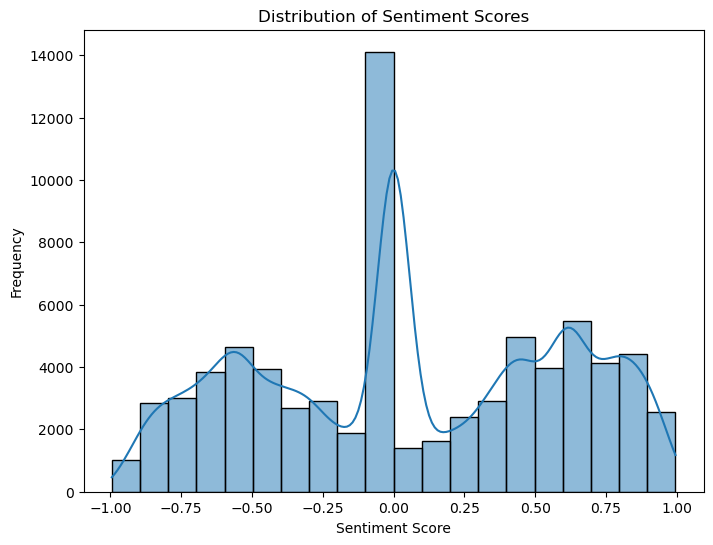

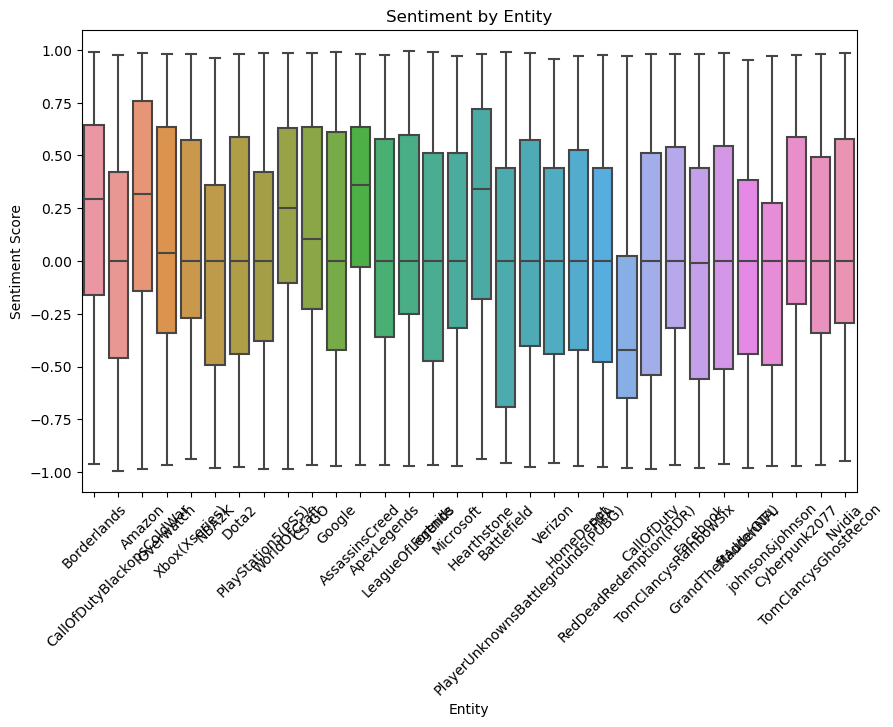

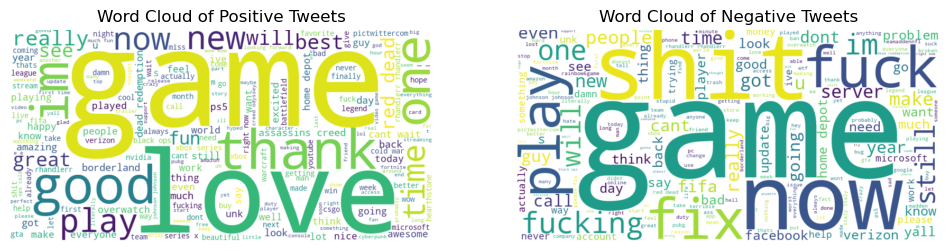

              precision    recall  f1-score   support

  Irrelevant       0.50      0.33      0.40      2661
    Negative       0.62      0.69      0.66      4471
     Neutral       0.50      0.52      0.51      3551
    Positive       0.60      0.63      0.61      4254

    accuracy                           0.57     14937
   macro avg       0.55      0.54      0.54     14937
weighted avg       0.56      0.57      0.56     14937



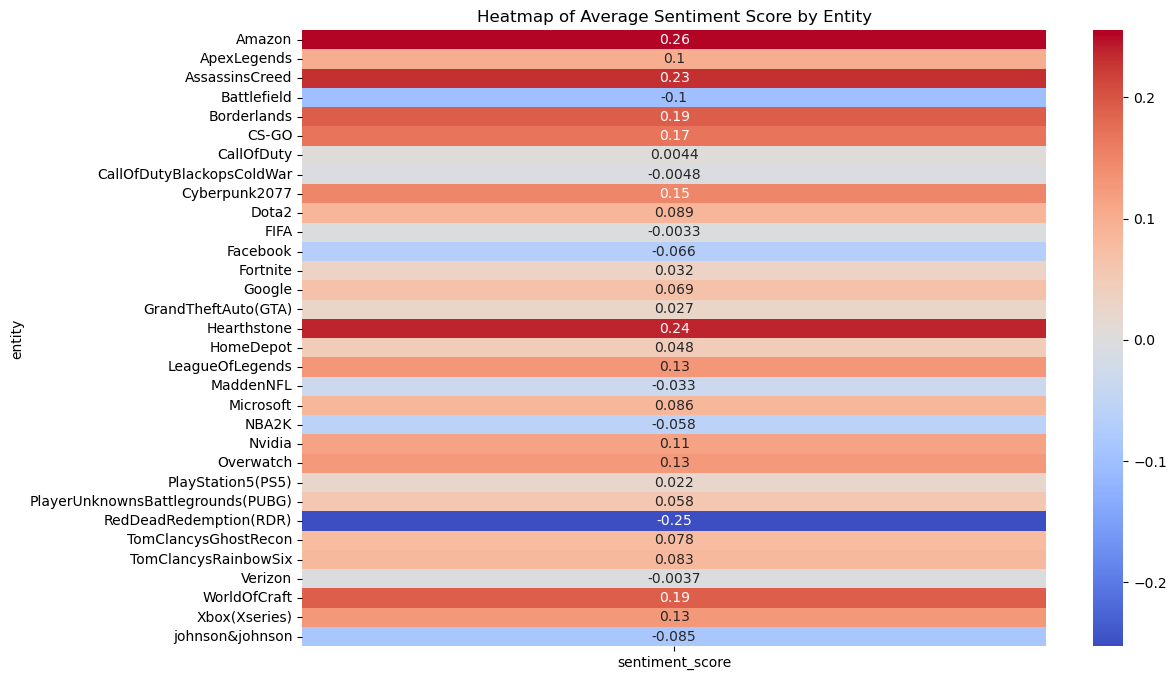

In [28]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("twitter_training.csv", usecols=['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,'])

# Rename columns for clarity
df.columns = ['id', 'entity', 'sentiment', 'text']

# Fill missing text values with empty strings
df['text'] = df['text'].fillna('')

# Data Preprocessing
df['text'] = df['text'].str.lower()  # Convert text to lowercase
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'@[^\s]+', '', x))  # Remove mentions
df['text'] = df['text'].apply(lambda x: re.sub(r'#([^\s]+)', r'\1', x))  # Remove hashtags
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove special characters

# Tokenization
nltk.download('punkt')
df['tokens'] = df['text'].apply(word_tokenize)  # Tokenization (splitting text into individual words or tokens)

# Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()  # Initialize the VADER sentiment analyzer
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])  # Perform sentiment analysis

# Display the preprocessed data and sentiment scores
print(df[['text', 'tokens', 'sentiment_score']].head())

# EDA: Explore sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Visualize sentiment by entity (e.g., brand, topic)
plt.figure(figsize=(10, 6))
sns.boxplot(x='entity', y='sentiment_score', data=df)
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

# Word cloud of most frequent words in positive and negative tweets
# Extract positive and negative tweets
positive_tweets = df[df['sentiment'] == 'Positive']['text'].str.cat(sep=' ')
negative_tweets = df[df['sentiment'] == 'Negative']['text'].str.cat(sep=' ')

# Generate word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Tweets')
plt.axis('off')

plt.show()

# Sentiment classification (example using logistic regression)
# Prepare data for classification
X = df['text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Advanced visualizations (optional)
# Heatmap of sentiment by entity
pivot_table = df.pivot_table(values='sentiment_score', index='entity', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Average Sentiment Score by Entity')
plt.show()
